In [2]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('dark_background')

In [3]:
iris =  datasets.load_iris()

In [4]:
iris_pd= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [5]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


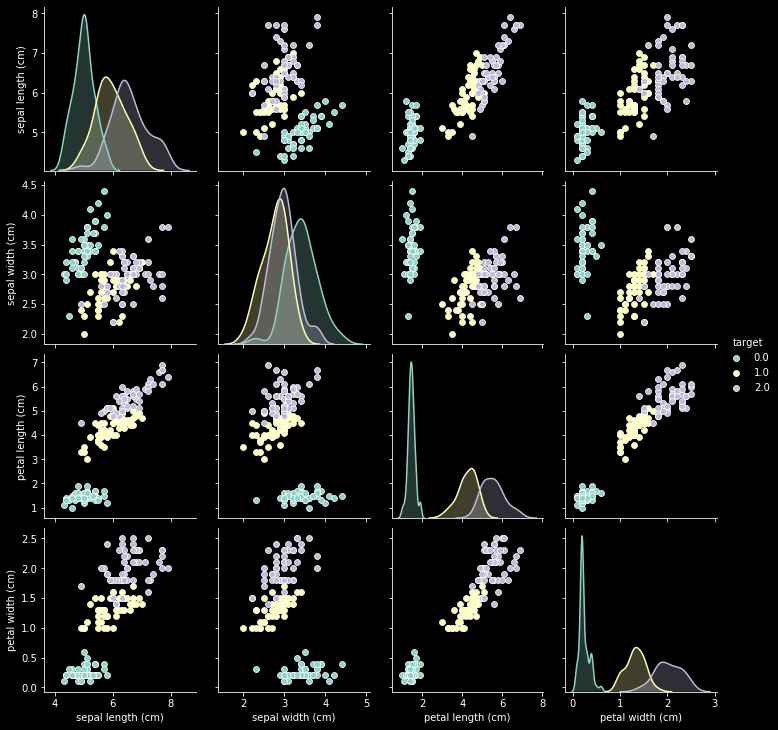

In [6]:
a=sns.pairplot(iris_pd, hue = "target")

Reducing 3 classes into 2: 

Based on looking at "petal length vs petal length" and "petal width vs petal width" in the seaborn plot above, it is clear that target 0.0 could be decoupled from this classification problem. 

Below code finds what the maximum petal length and petal width are which correspond to target 0.0. The idea here is that, later when we build a hypothesis/predictor model, when petal length and petal width are equal or under these values, then you automatically classify them as target 0.0 (regardless of sepal sizes).

In [7]:
zero=np.array(iris_pd[["target"]]).flatten()
counter=0
for i in range(0,len(iris_pd)):
    if zero[i]==0.:
        counter=counter+1
print("Row number where target 0.0 ends inclusively: {}".format(counter-1))

Row number where target 0.0 ends inclusively: 49


In [42]:
iris_pd["target"].unique()
iris_pd_0 = iris_pd[iris_pd["target"] == 0]
iris_pd_0.shape[0]

50

In [28]:
summary_iris_target = iris_pd.groupby(['target']).size()
summary_iris_target

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [21]:
summary_iris_target.index.values

array([0., 1., 2.])

In [52]:
zero_df = iris_pd[iris_pd["target"] == 0]
zero_df = zero_df[["petal length (cm)","petal width (cm)"]]


maxPetalLength = np.amax(zero_df[["petal length (cm)"]])
maxPetalWidth = np.amax(zero_df[["petal width (cm)"]])

In [13]:
Zero=np.array(iris_pd[["petal length (cm)","petal width (cm)","target"]])
Zero=Zero[1:counter]

maxPetalLength=np.amax(Zero[:,0])
maxPetalWidth=np.amax(Zero[:,1])

print("Given new input data, if Petal Length is <=: {} and/or Petal Width <=: {} then it is target 0.0 ".format(maxPetalLength,maxPetalWidth))

Given new input data, if Petal Length is <=: 1.9 and/or Petal Width <=: 0.6 then it is target 0.0 


In [25]:
np.array(iris_pd["target"])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [27]:

target0=[]
for i in len(np.array(iris_pd[["petal width (cm)","target"]]))
Zero[i,]



array([[0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.2, 0. ],
       [0.5, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.4, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.3, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.6, 0. ],
       [0.4, 0. ],
       [0.3, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.5,

In [81]:
def class_zero_finder(petal_width, petal_length):
    if petal_width < float(maxPetalWidth) or petal_length < float(maxPetalLength):
        res = "0"
    else:
        res = "other"
    return res

In [90]:
iris_pd.loc[32]

sepal length (cm)    5.2
sepal width (cm)     4.1
petal length (cm)    1.5
petal width (cm)     0.1
target               0.0
Name: 32, dtype: float64

In [91]:
class_zero_finder(0.1, 1.5)

'0'

New data frame

In [93]:
class_1_2_df  = iris_pd[iris_pd["target"] != 0]

In [97]:
class_1_2_df['target'] = class_1_2_df['target'].astype('category')

/home/boniface/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


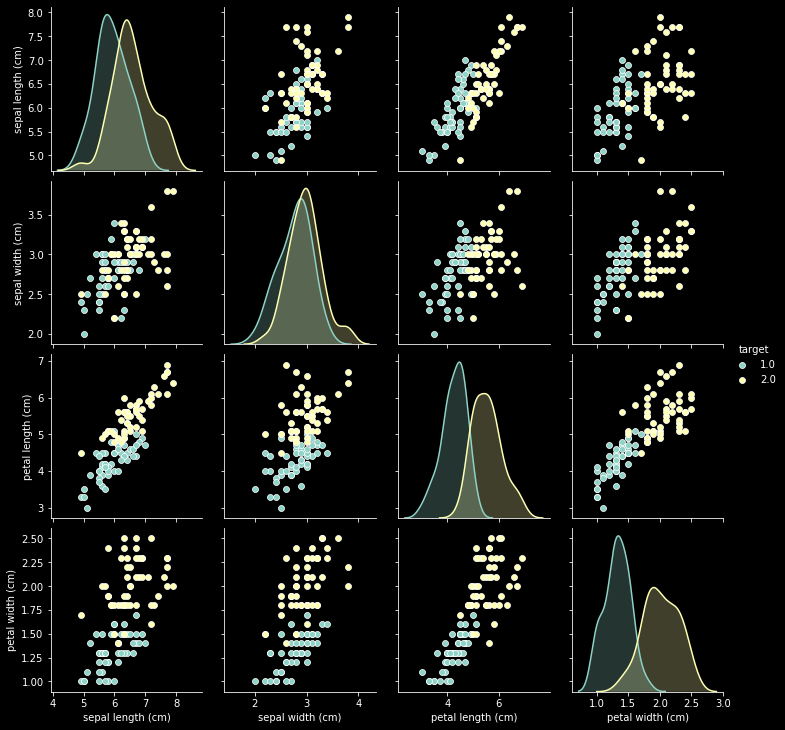

In [98]:
sns.pairplot(class_1_2_df, hue = "target")

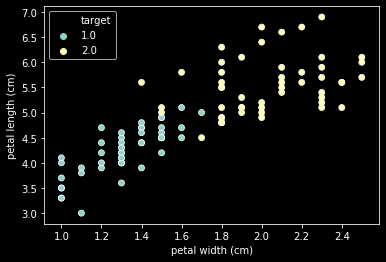

In [104]:
sns_plot = sns.scatterplot(data=class_1_2_df, x="petal width (cm)", y="petal length (cm)", hue = "target")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [6]:
selected_cols = iris_pd[["petal width (cm)", "sepal length (cm)","target"]]

In [7]:
selected_cols = selected_cols.rename(columns={"petal width (cm)": "pedal_width", "sepal length (cm)": "sepal_length"})

In [8]:
selected_cols

,pedal_width,sepal_length,target
0,0.2,5.1,0.0
1,0.2,4.9,0.0
2,0.2,4.7,0.0
3,0.2,4.6,0.0
4,0.2,5.0,0.0
...,...,...,...
145,2.3,6.7,2.0
146,1.9,6.3,2.0
147,2.0,6.5,2.0
148,2.3,6.2,2.0


In [9]:
temp_pd = iris_pd[["sepal width (cm)", "sepal length (cm)", "target"]]

In [10]:
temp_pd

,sepal width (cm),sepal length (cm),target
0,3.5,5.1,0.0
1,3.0,4.9,0.0
2,3.2,4.7,0.0
3,3.1,4.6,0.0
4,3.6,5.0,0.0
...,...,...,...
145,3.0,6.7,2.0
146,2.5,6.3,2.0
147,3.0,6.5,2.0
148,3.4,6.2,2.0


In [11]:
temp_pd.groupby(['target']).size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [12]:
temp_pd = temp_pd.rename(columns={"sepal width (cm)": "pedal_width", "sepal length (cm)": "sepal_length"})

In [13]:
temp_pd[["sepal_width"]] =  np.log(temp_pd[["sepal_width"]])

KeyError: "None of [Index(['sepal_width'], dtype='object')] are in the [columns]"

In [ ]:
temp_pd['target'] = temp_pd['target'].astype('category')

In [ ]:
sns.scatterplot(data=temp_pd, x="pedal_width", y="sepal_length", hue="target")

In [ ]:
temp_pd